In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# 讀取數據
data_path = 'train_dataset.csv'
data = pd.read_csv(data_path)

In [6]:
# 查看數據基本信息
print(data.head(10))
print(data.info())
print(data.describe())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PIRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.17004  12.5   7.87     0  0.524  6.004  85.9  6.5921    5  311     15.2   
5  0.22489  12.5   7.87     0  0.524  6.377  94.3  6.3467    5  311     15.2   
6  0.11747  12.5   7.87     0  0.524  6.009  82.9  6.2267    5  311     15.2   
7  0.09378  12.5   7.87     0  0.524  5.889  39.0  5.4509    5  311     15.2   
8  0.62976   0.0   8.14     0  0.538  5.949  61.8  4.7075    4  307     21.0   
9  0.63796   0.0   8.14     0  0.538  6.096  84.5  4.4619    4  307     21.0   

        B  LSTAT  PRICE  
0  396.90   4.98   24.0  
1  396.90   9.14   21.6  
2  392.83   4.03   34.7  
3  394.63   2.9

In [7]:
# 處理缺失值（如有）
data = data.dropna()

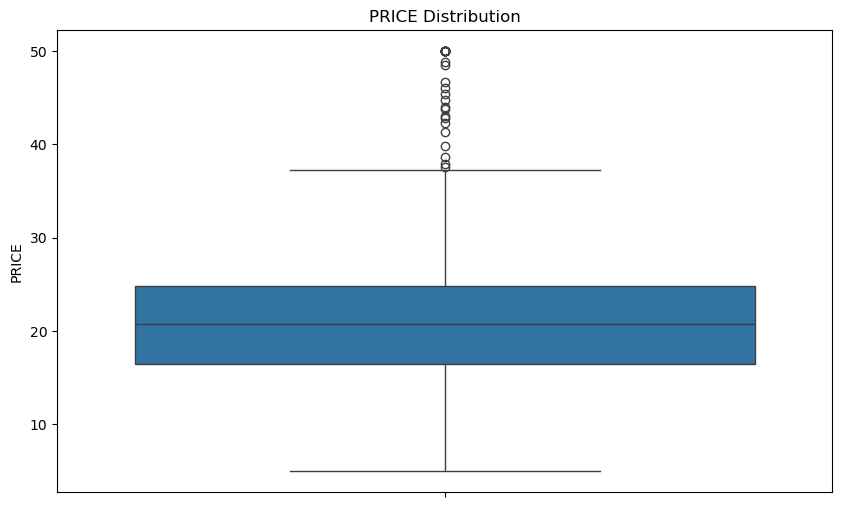

In [8]:
# 進行探索性數據分析（EDA）
plt.figure(figsize=(10, 6))
sns.boxplot(data['PRICE'])
plt.title('PRICE Distribution')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_11616\567270389.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['PRICE'])


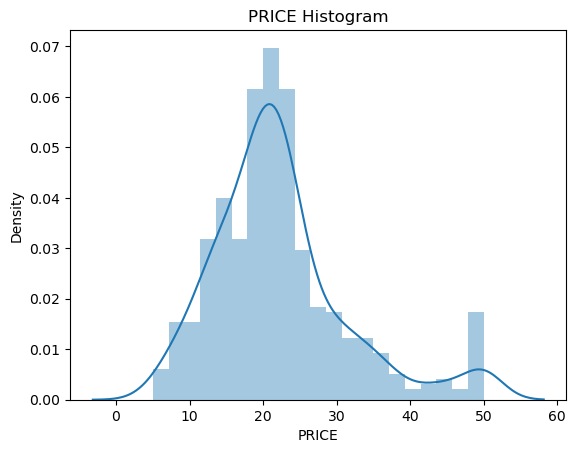

In [9]:
sns.distplot(data['PRICE'])
plt.title('PRICE Histogram')
plt.show()

In [12]:
# 特徵選擇
X = data.drop('PRICE', axis=1)
y = data['PRICE']

# 分割數據集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# 數據標準化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 訓練模型
model = LinearRegression()
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 模型評估
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 32.181670908436494
R-squared: 0.6228114998369043


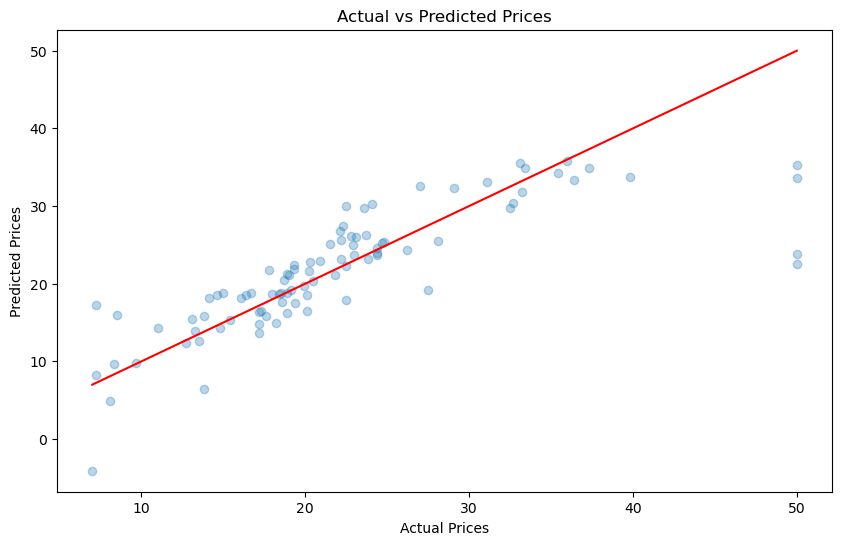

In [13]:
# 繪製預測結果
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()